In [1]:
import re
import numpy as np
import networkx as nx
from nltk import sent_tokenize
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# https://www.youtube.com/watch?v=qxEkY8OScYY
# https://towardsdatascience.com/getting-started-with-natural-language-processing-nlp-2c482420cc05

In [3]:
text = """
Despite bitcoin’s meteoric rise of over 550% this year, on-chain analysis paints a picture of it still being early in the game. Why? Three words: Coin Days Destroyed (CDD).
NOWHERE NEAR THE TOP THIS YEAR
By assessing CDD, we can visualize the confidence among long-term bitcoin holders relative to the current price of bitcoin.
To understand how CDD works, let’s start with coin days.
WHAT IS A COIN DAY?
Coin days are the number of days since a bitcoin was moved over from one wallet to another. The logic behind them is to assign a higher value to an idle coin. Why? Because long-term bitcoin holders have greater knowledge of market cycle volatility and thus are more adept at identifying the best times to buy or sell.
So when long-term holders sell their bitcoin, the Coin Days Destroyed will surge higher. When strong hands hold, CDD trends lower which suggests their confidence in a new bull market.
WHAT ARE COIN DAYS DESTROYED?
Coin Days Destroyed is a term for when bitcoin that’s been sitting in a wallet—accruing coin days—is all of a sudden sold, causing those coin days to be “destroyed.” Importantly, bitcoin is not actually destroyed. CDD is simply terminology that calculates the time erased.
Here’s an example: Imagine an investor purchases 1 bitcoin and holds it in their wallet for 90 days, then sees a big increase in the price and decides to sell. He would have “destroyed” 90 bitcoin days.
When investors are accumulating (and few old coins are spent), Coin Days Destroyed will trend downwards. During late-stage bull markets, old coins often are increasingly spent and will lead to a spike in Coin Days Destroyed.
The beauty of this formula: It weighs less on the activity of short-term traders. Since these traders don’t hold bitcoin for long, their impact on Coin Days Destroyed will be minimal as compared to the activities of long-term traders.
However, when long-term holders are starting to sell their bitcoin, it’s worth paying attention to.
When we look at these important metrics, it appears that bitcoin is nowhere near its high this year. Bitcoin is now over $40,000 but the 90-day moving average for Coin Days Destroyed is near its lowest levels.
The decline in Coin Days Destroyed shows that old hands are stronger than ever amid the price increase.
HOW IS CDD CALCULATED?
Coin Days Destroyed is calculated by:
The number of bitcoin in a transaction
Multiplied by the number of days since those coins were last spent.
The “destroyed” part comes into effect when it is removed on receipt. Once again, it means the coins held for long periods of time will carry more weight in CDD.
This on-chain metric shows the weight of the strong hands versus the short-term speculators.
The current number of Coin Days Destroyed is far lower than the 2017 price top. So, this indicates that fewer veteran hands are selling than in the previous bull cycles.
Considering the Bitcoin network is now 12 years old and the current BTC supply has already appreciated, it’s telling that strong hands are not selling their holdings. This suggests that the market top is nowhere near our current price.
What’s more, the higher demand from institutional investors could be the primary force behind this recent surge in long-term confidence from veteran holders.
In April, Fidelity Investments, with $10.3 trillion in assets under management, introduced an analytics platform capable of on-chain Bitcoin data visualization for its institutional clients called “Sherlock.” Wells Fargo is also preparing to embrace bitcoin investing, as it announces it will offer an actively managed cryptocurrency product.
These moves by high-profile asset management firms underscore the rise of institutional investors who are banking on the future growth in Bitcoin.
This is a guest post by Portfolio Insider. Opinions expressed are entirely their own and do not necessarily reflect those of BTC, Inc. or Bitcoin Magazine.
"""

In [4]:
sentences = sent_tokenize(text.replace('\n', ' '))
stopwords = sw.words('english')
processed_sentences = []
words = []

# text preprocessing
for sentence in sentences:
    sentence = sentence.lower()
    sentence = re.sub("’", '', sentence)
    sentence = re.sub('[^a-z0-9]', ' ', sentence)
    sentence = ' '.join([word for word in word_tokenize(sentence) if word not in stopwords])
    processed_sentences.append(sentence)
    words.append(word_tokenize(sentence))

In [5]:
# Extract word vectors
word_embeddings = {}
f = open('data/glove.6B.100d.txt', encoding='utf-8')
for line in f.readlines():
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [6]:
# textrank algorithm
sentence_vectors = []
for i in range(len(processed_sentences)):
    sentence = sentences[i]
    if (len(sentence) == 0):
        continue
    vectors = sum([word_embeddings.get(word, np.zeros(100,)) for word in sentence.split()]) / len(sentence.split())
    sentence_vectors.append(vectors)

In [7]:
# similarity matrix
sim_mat = np.zeros((len(sentences), len(sentences)))

for i in range(0, len(sentences)):
    for j in range(0, len(sentences)):
        if i == j:
            continue
        sim_mat[i, j] = cosine_similarity(sentence_vectors[i].reshape(1, 100), sentence_vectors[j].reshape(1, 100))[0, 0]
# np.fill_diagonal(sim_mat, 0)

In [8]:
graph = nx.from_numpy_array(sim_mat)
ranks = nx.pagerank(graph)

ranked_sentences = sorted(((ranks[i], sentence) for i, sentence in enumerate(sentences)), reverse=True)

In [9]:
for i in range(10):
    print(ranked_sentences[i][1], end=' ')

Considering the Bitcoin network is now 12 years old and the current BTC supply has already appreciated, it’s telling that strong hands are not selling their holdings. Once again, it means the coins held for long periods of time will carry more weight in CDD. Since these traders don’t hold bitcoin for long, their impact on Coin Days Destroyed will be minimal as compared to the activities of long-term traders. So, this indicates that fewer veteran hands are selling than in the previous bull cycles. Coin Days Destroyed is a term for when bitcoin that’s been sitting in a wallet—accruing coin days—is all of a sudden sold, causing those coin days to be “destroyed.” Importantly, bitcoin is not actually destroyed. Because long-term bitcoin holders have greater knowledge of market cycle volatility and thus are more adept at identifying the best times to buy or sell. The decline in Coin Days Destroyed shows that old hands are stronger than ever amid the price increase. Here’s an example: Imagine

<AxesSubplot:>

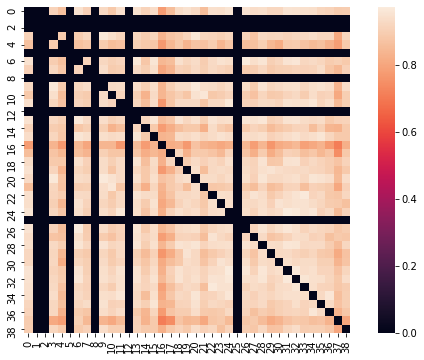

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
# sns.heatmap(sim_mat)
plt.figure(figsize=(10, 6))
sns.heatmap(sim_mat, square=True)